In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,3,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,2,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,1,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,2,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,2,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


In [246]:
age = data["Age"]
age_counts = data["Age"].value_counts()
age_index = data["Age"].index
age_counts_index = age_counts.index

print(type(age))
# print(age)
print(type(age_counts))
# print(age_counts)
print(type(age_index))
# print(age_index)
print(type(age_counts_index))
print(age_counts_index)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>
Index([22, 21, 19, 20, 23, 18, 25], dtype='int64', name='Age')


Text(0.5, 0, 'Age')

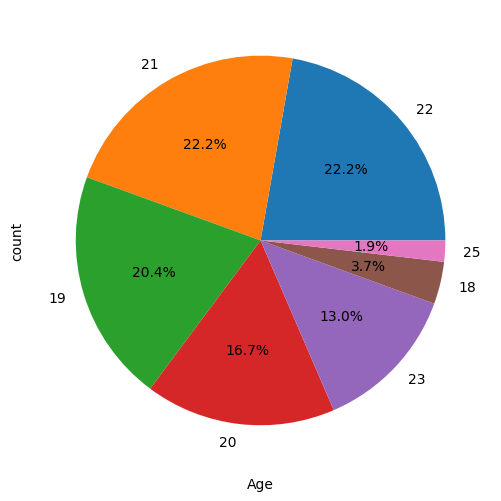

In [225]:
plot = data["Age"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%1.1f%%")
plot.set_xlabel('Age')

In [226]:
gender_mapping = {1: "Male", 2: "Female", 3: "Other"}
data['Gender'] = data["Gender"].map(gender_mapping)
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


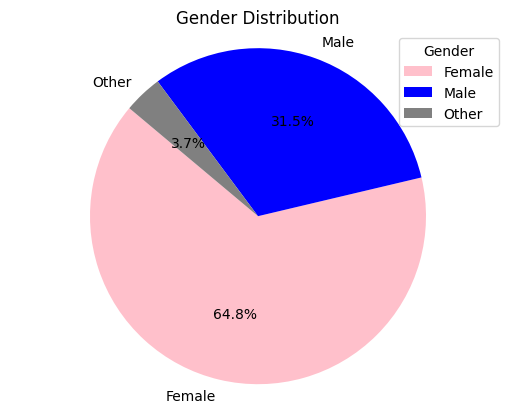

In [227]:
colors = ["pink", "blue", "gray"]
genders = data["Gender"]
legend_labels = genders.value_counts().index

plt.pie(genders.value_counts(), labels=genders.value_counts().index, colors=colors, autopct="%1.1f%%", startangle=140)
plt.legend(legend_labels, title="Gender", loc="upper right")
plt.title("Gender Distribution")
plt.axis('equal') 

genders.value_counts()
plt.show()


In [228]:
gender_counts = data["Gender"].value_counts()
gender_percentage = (gender_counts / len(data)) * 100
# gender_percentage = gender_percentage.round(2).astype(str) + "%"
gender_summary = pd.DataFrame({'Gender': gender_counts.index, 'Frequency': gender_counts.values, 'Percentage': gender_percentage.values})
gender_summary = gender_summary.sort_values(by="Frequency", ascending=False)
total_row = pd.DataFrame({'Gender': ['Total'], 'Frequency': [gender_counts.sum()], 'Percentage': [gender_percentage.sum()]})
gender_summary = pd.concat([gender_summary, total_row], ignore_index=True)
gender_summary


,Gender,Frequency,Percentage
0,Female,35,64.814815
1,Male,17,31.481481
2,Other,2,3.703704
3,Total,54,100.000000


In [229]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


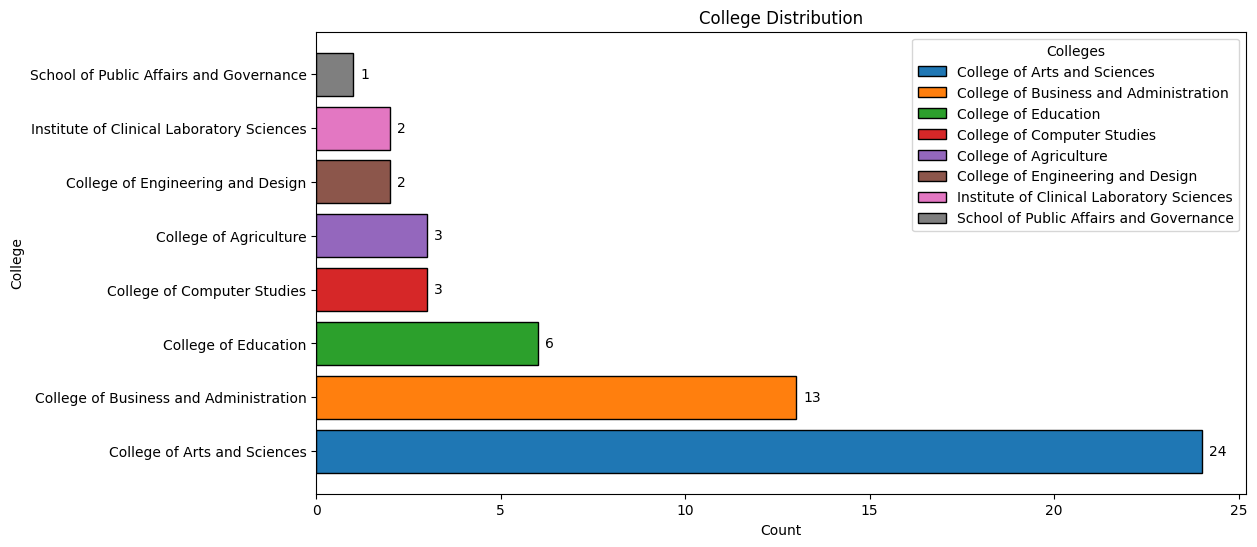

In [230]:
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
college_mapping = {
    1: "College of Agriculture", 
    2: "College of Arts and Sciences", 
    3: "College of Business and Administration", 
    4: "College of Computer Studies", 
    5: "Divinity School", 
    6: "College of Education", 
    7: "College of Engineering and Design", 
    8: "College of Mass Communication", 
    9: "Medical School", 
    10: "College of Nursing", 
    11: "College of Performing and Visual Arts", 
    12: "Graduate Program", 
    13: "School of Public Affairs and Governance", 
    14: "Institute of Clinical Laboratory Sciences", 
    15: "Institute of Environmental and Marine Sciences", 
    16: "Institute of Rehabilitative Sciences", 
    17: "Senior High School"
}

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#1a55FF", "#FF1A1A",
    "#1AFF1A", "#FF1A8C", "#1A8CFF", "#FF8C1A",
    "#8C1AFF"  
]

data["College"] = data["College"].map(college_mapping)
data["College"].value_counts()
college_counts = data["College"].value_counts()
legend_labels = college_counts.index

plt.figure(figsize=(12, 6))
for i, college in enumerate(college_counts.index):
    plt.barh(college, college_counts[college], color=colors[i], edgecolor='black', label=college)
    plt.text(college_counts[college] + 0.2 , i, str(college_counts[college]), va='center', fontsize=10)

plt.legend(title="Colleges", loc="upper right")
plt.xlabel('Count')
plt.ylabel('College')
plt.title('College Distribution')

plt.show()

In [231]:
college_percentage = (college_counts / len(data) * 100).round(2)
percentage_copy = college_percentage
college_summary = pd.DataFrame({"College": college_counts.index, "Frequency": college_counts.values, "Percentage": college_percentage.values})

college_counts_total = college_counts.sum()
college_percentage_total = college_percentage.sum().astype(str) + "%"

total_row = pd.DataFrame({"College": ["Total"], "Frequency": college_counts_total, "Percentage": college_percentage_total})
college_summary = pd.concat([college_summary, total_row], ignore_index=True)
college_summary

,College,Frequency,Percentage
0,College of Arts and Sciences,24,44.44
1,College of Business and Administration,13,24.07
2,College of Education,6,11.11
3,College of Computer Studies,3,5.56
4,College of Agriculture,3,5.56
5,College of Engineering and Design,2,3.7
6,Institute of Clinical Laboratory Sciences,2,3.7
7,School of Public Affairs and Governance,1,1.85
8,Total,54,99.99%


In [232]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,3,College of Arts and Sciences,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,2,College of Arts and Sciences,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,1,College of Business and Administration,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,2,College of Arts and Sciences,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,2,College of Engineering and Design,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


In [233]:
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
def format_column(df, column_name, decimals=2, suffix="%"):
  formatted_column = (df[column_name].round(decimals).astype(str) + suffix)
  return formatted_column

def round_off_values(column_name, decimals=2, suffix="%"):
  formatted_column = column_name.round(decimals)
  return formatted_column

def summarize_data(data, column_name):
  row_data = data[column_name]
  row_stats = data[column_name].describe()
  kurtosis_value = stats.kurtosis(row_data)
  skew_value = stats.skew(row_data)
  
  stats_summary = pd.DataFrame({
      "Mean": round_off_values(row_stats["mean"]),
      "STD": round_off_values(row_stats["std"]),
      "Min": round_off_values(row_stats["min"]),
      "Kurtosis": round_off_values(kurtosis_value),
      "Skew": round_off_values(skew_value),
      "25% Percentile": format_column(row_stats, "25%"),
      "50% Percentile": format_column(row_stats, "50%"),
      "75% Percentile": format_column(row_stats, "75%")
    }, index=[column_name]
  )
  return stats_summary

global_summary = summarize_data(data, "Global score")
well_being_summary = summarize_data(data, "Well-being")
self_control_summary = summarize_data(data, "Self-Control")
emotionality_summary = summarize_data(data, "Emotionality")
sociability = summarize_data(data, "Sociability")
brs_summary = summarize_data(data, "BRS")
tei_summary = summarize_data(data, "TEI_Mean")

data_frames_list = [
  global_summary,
  well_being_summary,
  self_control_summary,
  emotionality_summary,
  sociability,
  brs_summary,
  tei_summary
]

summary_df = pd.concat(data_frames_list)
summary_df

,Mean,STD,Min,Kurtosis,Skew,25% Percentile,50% Percentile,75% Percentile
Global score,4.76,0.88,2.63,0.08,-0.30,4.33%,4.72%,5.32%
Well-being,5.07,1.20,1.50,0.71,-0.70,4.5%,5.08%,5.96%
Self-Control,4.34,1.03,1.33,0.91,0.17,3.83%,4.25%,4.83%
Emotionality,4.90,0.94,2.13,0.57,-0.44,4.38%,4.88%,5.5%
Sociability,4.69,0.96,1.67,0.67,-0.48,4.17%,4.67%,5.33%
BRS,3.29,0.70,1.67,-0.14,-0.04,2.87%,3.33%,3.67%
TEI_Mean,4.75,0.86,2.77,-0.07,-0.27,4.3%,4.74%,5.33%


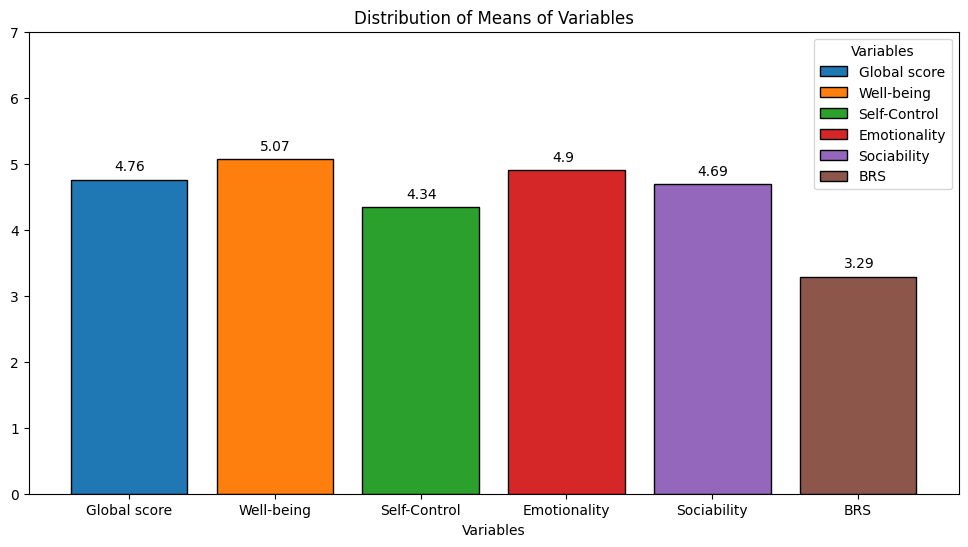

In [234]:
mean_data = summary_df["Mean"]

mean_values = mean_data.index
mean_counts = mean_data.values

colors = [
  "#1f77b4", "#ff7f0e", "#2ca02c", 
  "#d62728", "#9467bd", "#8c564b",
]

plt.figure(figsize=(12, 6))
for i, data in enumerate(mean_data):
    if i < len(mean_values) and i < len(colors): 
        plt.bar(mean_values[i], data, color=colors[i], label=mean_values[i], edgecolor="black")
        plt.text(i - 0.1, data + 0.2, str(data), va="center")

plt.legend(title="Variables", loc="upper right")
plt.xlabel('Variables')  
plt.ylim(0, 7) 
plt.title('Distribution of Means of Variables')  
plt.show()

Text(0.5, 1.0, 'Histogram')

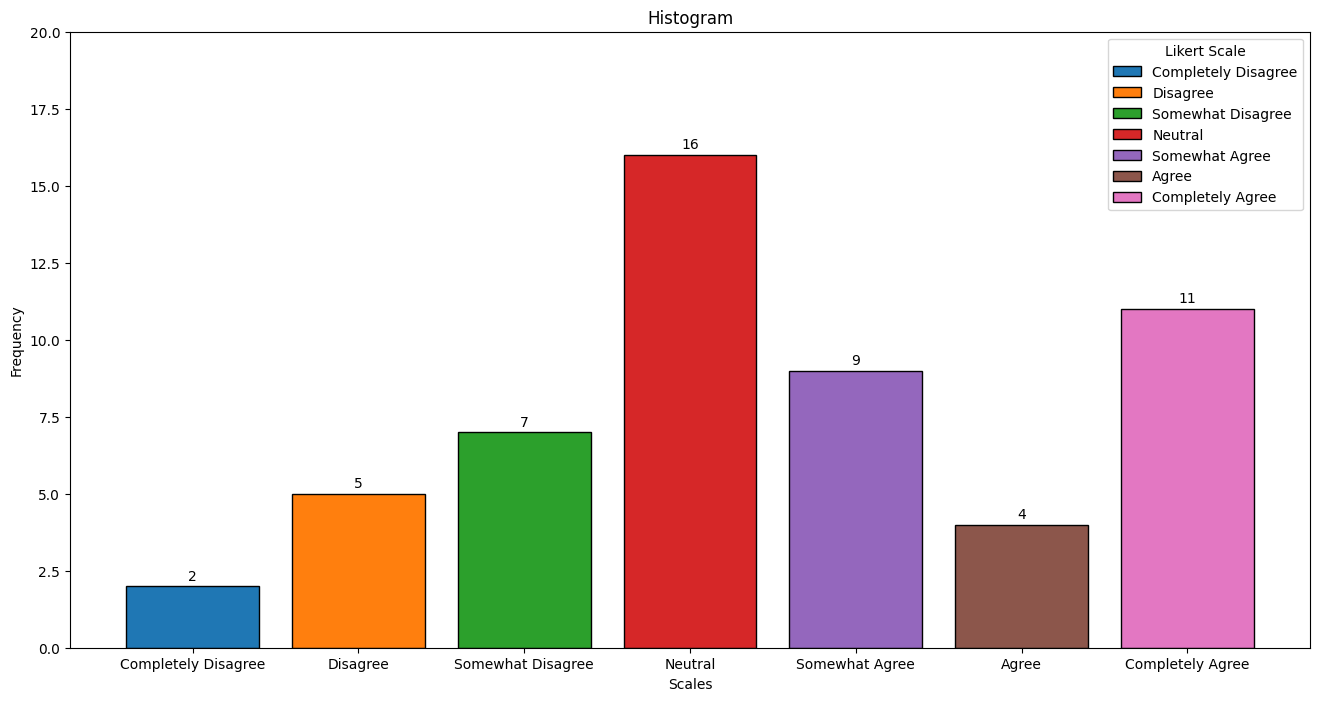

In [235]:
raw_data = pd.read_csv("../src/data/tei_brs_raw - Sheet1.csv")

scale_mapping = {
  1: "Completely Disagree",
  2: "Disagree",
  3: "Somewhat Disagree",
  4: "Neutral",
  5: "Somewhat Agree",
  6: "Agree",
  7: "Completely Agree"
}

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2",
]

custom_order = [
  "Completely Disagree",
  "Disagree",
  "Somewhat Disagree",
  "Neutral",
  "Somewhat Agree",
  "Agree",
  "Completely Agree"
]

raw_data["EI1"] = raw_data["EI1"].map(scale_mapping)

ei_one = raw_data["EI1"]
ei_one_counts = ei_one.value_counts()
ei_one_counts = ei_one_counts.reindex(custom_order)
ei_one_index = ei_one_counts.index
ei_one_values = ei_one_counts.values

plt.figure(figsize=(16,8))
for i, data in enumerate(ei_one_values):
  plt.bar(ei_one_index[i], data, edgecolor="black", label=ei_one_index[i], color=colors[i])
  plt.text(i, data + 0.2, str(data), ha="center")
  

plt.ylim(0, 20)
plt.legend(title="Likert Scale", loc="upper right")
plt.xlabel("Scales")
plt.ylabel("Frequency")
plt.title("Histogram")

In [236]:
raw_data = pd.read_csv("../src/data/tei_brs_raw - Sheet1.csv")
raw_data.value_counts()

scale_mapping = {
  1: "Completely Disagree",
  2: "Disagree",
  3: "Somewhat Disagree",
  4: "Neutral",
  5: "Somewhat Agree",
  6: "Agree",
  7: "Completely Agree"
}

mapped_data = raw_data.applymap(lambda x: scale_mapping.get(x,x))
average_completely_disagree = (mapped_data == "Disagree")

# for i in range(1, 30):
#   column_name = "EI" + str(i)
#   summed_data += mapped_data[column_name].value_counts()

# summed_data


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2876\2283932406.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = raw_data.applymap(lambda x: scale_mapping.get(x,x))


In [317]:
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
college_mapping = {
    1: "College of Agriculture", 
    2: "College of Arts and Sciences", 
    3: "College of Business and Administration", 
    4: "College of Computer Studies", 
    5: "Divinity School", 
    6: "College of Education", 
    7: "College of Engineering and Design", 
    8: "College of Mass Communication", 
    9: "Medical School", 
    10: "College of Nursing", 
    11: "College of Performing and Visual Arts", 
    12: "Graduate Program", 
    13: "School of Public Affairs and Governance", 
    14: "Institute of Clinical Laboratory Sciences", 
    15: "Institute of Environmental and Marine Sciences", 
    16: "Institute of Rehabilitative Sciences", 
    17: "Senior High School"
}

gender_mapping = {1: "Male", 2: "Female", 3: "Other"}

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#1a55FF", "#FF1A1A",
    "#1AFF1A", "#FF1A8C", "#1A8CFF", "#FF8C1A",
    "#8C1AFF"  
]

df = pd.DataFrame(data)

data["College"] = data["College"].map(college_mapping)
data['Gender'] = data["Gender"].map(gender_mapping)

college = data["College"].value_counts()
college_index = college.index
college_values = college.values

college_computer_studies = df[df["College"] == "College of Computer Studies"]

ccs_gender_counts = college_computer_studies.groupby('Gender')['Count'].sum()

# print(college_index)
# print(college_values)

KeyError: 'Column not found: Count'

                        College  Gender  Count
0   College of Computer Studies    Male     80
1   College of Computer Studies  Female     70
2  College of Arts and Sciences    Male     60
3  College of Arts and Sciences  Female     90


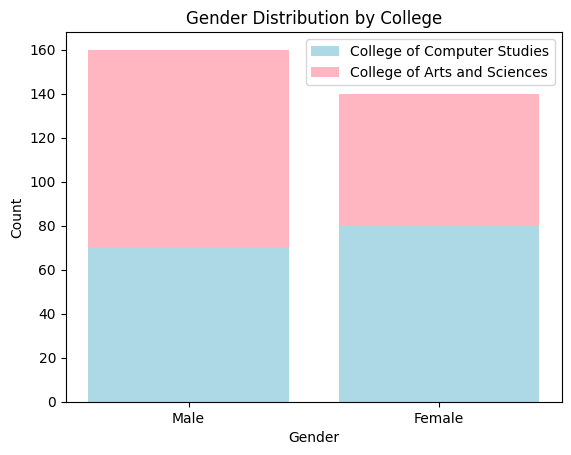

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Mock data
data = {
    'College': ['College of Computer Studies', 'College of Computer Studies', 'College of Arts and Sciences', 'College of Arts and Sciences'],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Count': [80, 70, 60, 90]
}

# Create a DataFrame from the mock data
df = pd.DataFrame(data)

# Filter the DataFrame for each college
college_of_computer_studies = df[df['College'] == 'College of Computer Studies']
college_of_arts_and_sciences = df[df['College'] == 'College of Arts and Sciences']

# Group and aggregate data for both colleges by gender
ccs_gender_counts = college_of_computer_studies.groupby('Gender')['Count'].sum()
cas_gender_counts = college_of_arts_and_sciences.groupby('Gender')['Count'].sum()

# Define gender labels and colors
genders = ['Male', 'Female']
colors = ['lightblue', 'lightpink']

# Create a stacked bar chart
fig, ax = plt.subplots()

# Create stacked bar plots for each college
ax.bar(genders, ccs_gender_counts, label='College of Computer Studies', color=colors[0])
ax.bar(genders, cas_gender_counts, bottom=ccs_gender_counts, label='College of Arts and Sciences', color=colors[1])

# Add labels and legend
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution by College')
ax.legend()

# Show the plot
plt.show()
